In [1]:
# DERIVAR EN SYMPY

In [2]:
import sympy as sp 
x=sp.symbols('x')
f=sp.exp(x)*sp.Abs(x)
d1f=sp.diff(f,x)
print('La derivada primera es: ',d1f)

La derivada primera es:  exp(x)*Abs(x) + (re(x)*Derivative(re(x), x) + im(x)*Derivative(im(x), x))*exp(x)*sign(x)/x


In [3]:
import sympy as sp
x=sp.symbols('x')
f=sp.exp(x)*sp.cos(x)
d2f=sp.diff(f,x,2)
print('La derivada segunda es: ',d2f)
d3f=sp.diff(f,x,3)
print('La derivada tercera es: ',d3f)

La derivada segunda es:  -2*exp(x)*sin(x)
La derivada tercera es:  -2*(sin(x) + cos(x))*exp(x)


In [4]:
# 2. Resolvemos el problema utilizando Sympy
x,xn=sp.symbols('x,xn')
# Funcion que describe el area de la seccion en funcion del angulo
f=4*sp.sin(x)*(1+sp.cos(x))
d1f=sp.diff(f,x)
d1fn=sp.lambdify(x,d1f)
alphamax=sp.solve(d1f)
print('La sección máxima se alcanza con ángulo: ',float(alphamax[1]))

La sección máxima se alcanza con ángulo:  1.0471975511965979


In [5]:
# 3. Aproximamos el máximo con el método de Newton
import numpy as np
maxit=100
eps=1e-4
d2fn=sp.diff(d1f,x)
d2fn=sp.lambdify(x,d2f)
xn=np.pi/2
for i in range(0,maxit):
    res=d1fn(xn)/d2fn(xn)
    xn=xn-res
    if (np.abs(res)<eps):
        break
print('La sección máxima se alcanza con ángulo: ',xn)

La sección máxima se alcanza con ángulo:  0.9650678568332388


In [6]:
import sympy as sp 

x = sp.Symbol('x', real=True)
f_exp = sp.sin(x) + x**2
display(f_exp)
display(sp.diff(f_exp,x))
display(sp.diff(f_exp,x,2))
display(sp.diff(f_exp,x,3))

x**2 + sin(x)

2*x + cos(x)

2 - sin(x)

-cos(x)

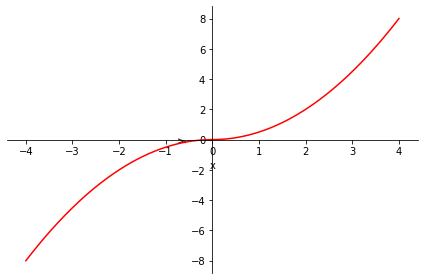

In [14]:
f_expr=0.5*x*sp.Abs(x)
p = sp.plot(f_expr, (x, -4, 4), show=False)
p[0].line_color = 'r'
p.xlabel = 'x'
p.ylabel = 'y'
p.show()


In [12]:
x = sp.Symbol('x', real=True)
h = sp.symbols('h', real=True)
f1 = 1/2*h*sp.Abs(h)

f2_0Minus = sp.limit((f1(h)-f1(0))/h, h, 0, dir='-')
f2_0Plus = sp.limit((f1(h)-f1(0))/h, h, 0, dir='-')
print('f2_0Minus = ', f2_0Minus, ', f2_0Plus = ', f2_0Plus)
print('Existe f\'\'(0)?', f2_0Minus==f2_0Plus)


TypeError: 'Mul' object is not callable

In [18]:
import sympy as sp 
t= sp.Symbol('t', real=True)
h= sp.Symbol('h', real=True)
gexpr= sp.Piecewise((1+sp.sqrt(t+3), (t<=0) ), (sp.exp(t)+sp.sqrt(3), t>0))
g = sp.Lambda(t, gexpr)
display(g)

a = 0
g_aMinus = sp.limit((g(a+h)-g(a))/h, h, 0, dir='-')

g_aPlus = sp.limit((g(a+h)-g(a))/h, h, 0, dir='+')
print('g_aMinus = ', g_aMinus, ', g_aPlus = ', g_aPlus)
print('Existe g\'(a)?', g_aMinus==g_aPlus)


dg = sp.diff(g(t))

Piecewise((sqrt(t + 3) + 1, t <= 0), (exp(t) + sqrt(3), True))

g_aMinus =  sqrt(3)/6 , g_aPlus =  sqrt(3)/6
Existe g'(a)? True


In [23]:
# Boletín 3: Ejercicio 2

import sympy as sp 

#t= sp.Symbol('t', real=True)
h= sp.Symbol('h', real=True)

x = sp.Symbol('x', real=True)
fexpr= sp.Piecewise(((2*x)-1, (x<=-1) ), (((x+1)**3)+2*x, x>-1))
f = sp.Lambda(x, fexpr)
display(f)

a = 0
f_aMinus = sp.limit((f(a+h)-f(a))/h, h, 0, dir='-')

f_aPlus = sp.limit((f(a+h)-f(a))/h, h, 0, dir='+')
print('f_aMinus = ', f_aMinus, ', f_aPlus = ', f_aPlus)
print('Existe f\'(a)?', f_aMinus==f_aPlus)


df = sp.diff(f(x))






Lambda(x, Piecewise((2*x - 1, x <= -1), (2*x + (x + 1)**3, True)))

f_aMinus =  5 , f_aPlus =  5
Existe f'(a)? True
La sección máxima se alcanza con ángulo:  0.9650678568332388


In [9]:
import sympy as sp
import numpy as np
x=sp.symbols('x')
# La funcion f es simbolica: no podemos evaluarla
# en variables numericas que almacenen valores en coma flotante, 
# o en arrays de numpy
f=sp.sin(x)*sp.exp(x)
# La funcion fn es numerica, y podemos evaluarla en numeros en coma flotante o en arrays de Numpy
fn=sp.lambdify(x,f)
x=np.linspace(-np.pi,np.pi,5)
print(fn(x))

[-5.29217867e-18 -2.07879576e-01  0.00000000e+00  4.81047738e+00
  2.83391752e-15]


In [18]:
# Codigo aqui

import sympy as sp

x,t=sp.symbols('x,t')

# p: polinomio de Taylor
# R: resto en valor absoluto
def taylor(f,x0,n):
    p=0
    for i in range(n+1):
        p+=sp.diff(f,x,i).subs(x,x0)/sp.factorial(i)*(x-x0)**i # En esta parte del bucle se crea el polinomio de taylor ya que dependiendo de la i se crea este con el grado correspondiente
    R=sp.diff(f,x,n+1).subs(x,t)/sp.factorial(n+1)*(x-x0)**(n+1)# Por ejemplo si i=2: f(x0)+(f'(x0)/1!)(x-x0) + (f''(x0)/2!)(x-x0)**2
    return p,R                                                  # En cambio si i=1: f(x0)+(f'(x0)/1!)(x-x0)

In [7]:
# Codigo aqui
import sympy as sp
x=sp.symbols('x')
f=sp.sin(x)-sp.cos(x)
p,R=taylor(f,0,5)
print('Polinomio de Taylor: \n',p,'\n\n Resto de Taylor: \n',R)

Polinomio de Taylor: 
 x**5/120 - x**4/24 - x**3/6 + x**2/2 + x - 1 

 Resto de Taylor: 
 x**6*(-sin(t)/720 + cos(t)/720)


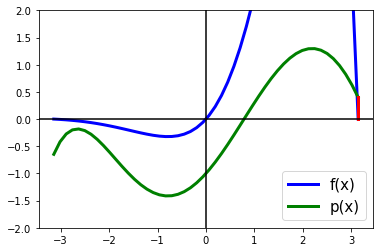

In [11]:
# Codigo aqui
import numpy as np
import matplotlib.pyplot as plt
x=sp.symbols('x')
fn=sp.lambdify(x,f)
pn=sp.lambdify(x,p)
x=np.linspace(-np.pi,np.pi)
plt.plot(x,fn(x),label='f(x)', lw='3',c='b')
plt.plot(x,pn(x),label='p(x)', lw='3',c='g')
plt.plot([np.pi,np.pi],[fn(np.pi),pn(np.pi)],lw='3',c='r')
plt.axhline(0,color='k')
plt.axvline(0,color='k')
plt.ylim(-2,2)
plt.legend(loc='lower right',fontsize=15)
plt.show()

In [31]:
import sympy as sp 


x=sp.Symbol('x', real=True)
f=x**3+4*x**2+8*x+3
p2,R2=taylor(f, 0, 2)
p3,R3=taylor(f, 0, 3)
p4,R4=taylor(f, 0, 4)
print('Polinomio de Taylor de orden 2: \n', p2, 'Resto de Taylor de orden 2: \n', R2)
print('Polinomio de Taylor de orden 3: \n', p3, 'Resto de Taylor de orden 3: \n', R3)
print('Polinomio de Taylor de orden 4: \n', p4, 'Resto de Taylor de orden 4: \n', R4)


Polinomio de Taylor de orden 2: 
 4*x**2 + 8*x + 3 Resto de Taylor de orden 2: 
 x**3
Polinomio de Taylor de orden 3: 
 4*x**2 + 8*x + 3 Resto de Taylor de orden 3: 
 x**3
Polinomio de Taylor de orden 4: 
 4*x**2 + 8*x + 3 Resto de Taylor de orden 4: 
 x**3


In [38]:
#Ejercicio 15 del boletín 3
#Debemos encontrarnos -e y +e y al ser distintos, la función no es derivable en x0=0
x=sp.Symbol('x', real=True)
expr=sp.Abs(x)/(sp.E)**(x-1)
f=sp.Lambda(x, expr)


x = sp.Symbol('x', real=True)
expr = 




Lambda(x, exp(1 - x)*Abs(x))

In [ ]:
#DERIVACIÓN EN NUMPY

In [ ]:
# MÉTODO NUMÉRICO DE NEWTON-RAPHSON
# Con este método buscamos aproximar la raíz de una función que cumple la hipótesis de bolzano. Para ello deberemos de conseguir qe la función se aproxime a la tangente.De la misma manera la raíz de dicha función debe aproximarse a la raíz de la tangente. 
# 1º Antes de nada debemos de comprobar que la función cumple el teorema de bolzana que dice que la funión debe ser continua y con dominio todo R en el conjunto a,b y además f(a)*f(b)<0
# Primero definimos las variables
# A continuación creamos todas las expresiones y las derivadas de estas. 
# Pasamos ambas a funciones, tanto la expresiones como las derivadas de esta.
# Definimos el número máximo de iteraciones.
# Introducimos la tolerancia.
# 
# Ahora empezaremos tomando un punto x0 existente en (a, b).


In [1]:
import numpy as np
import sympy as sp

x = sp.symbols('x', real=True) # define la variable simbólica x

f_expr = x**3+2*x-2
f_der_expr = sp.diff(f_expr,x)

f = sp.Lambda(x,f_expr)
f_der = sp.Lambda(x,f_der_expr)

N_max = 10
tol = 1.e-9

x_aprox = np.zeros(N_max)
x_aprox[0] = 2

for k in range(1,N_max):
   if f_der(x_aprox[k-1]) == 0: break

   x_aprox[k] = x_aprox[k-1] - f(x_aprox[k-1])/f_der(x_aprox[k-1])

   if ( (k > 0) and (np.abs(x_aprox[k]-x_aprox[k-1]) / np.abs(x_aprox[k]) < tol) ): break

print('Número de iteraciones realizadas: ', k) 
print('Aproximación de la raíz: ', x_aprox[k])
    

Número de iteraciones realizadas:  7
Aproximación de la raíz:  0.7709169970592481


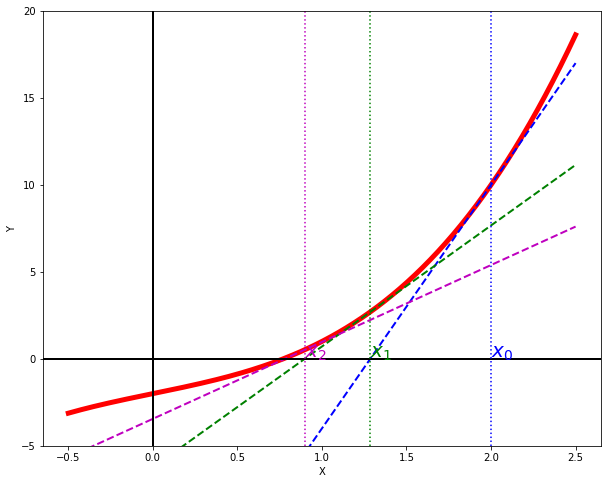

In [2]:
import matplotlib as mp
import matplotlib.pyplot as plt

mp.__version__

%matplotlib inline

xx = np.linspace(-0.5, 2.5, 200)
yy = [f(x) for x in xx]
x0 = x_aprox[0]
x1 = x_aprox[1]
x2 = x_aprox[2]
rt0 = f(x0) + f_der(x0) * (xx-x0) 
rt1 = f(x1) + f_der(x1) * (xx-x1) 
rt2 = f(x2) + f_der(x2) * (xx-x2) 

fig = plt.figure(figsize = (10,8))
plt.ylim(-5,20)

plt.plot(xx, yy, c='r', lw='5', label = '$f$')
plt.plot(xx, rt0, c='b', ls='--', lw='2', label = 'RT$_{x_{0}}$')
plt.plot(xx, rt1, c='g', ls='--', lw='2', label = 'RT$_{x_{1}}$')
plt.plot(xx, rt2, c='m', ls='--', lw='2', label = 'RT$_{x_{2}}$')
plt.ylabel('Y', fontsize=10)
plt.xlabel('X', fontsize=10)
plt.axhline(y=0., c='black', lw='2')
plt.axvline(x=0., c='black', lw='2')

plt.axvline(x=x0, c='b', ls=':')
plt.text(x0, 0.1, '$x_{0}$', c='b', fontsize=20)
plt.axvline(x=x1, c='g', ls=':')
plt.text(x1, 0.1, '$x_{1}$', c='g', fontsize=20)
plt.axvline(x=x2, c='m', ls=':')
plt.text(x2, 0.1, '$x_{2}$', c='m', fontsize=20)

plt.show()

In [3]:
# Este programa nos permite calcular las derivadas sucesivas de una función dada.
import sympy as sp

x = sp.symbols('x', real=True)
f_exp = sp.sin(x) + x**2
display(f_exp)
display(sp.diff(f_exp,x)) # Con el comando sp.diff podemos calcular la derivada de una función dada.
display(sp.diff(f_exp,x,2)) # Además si le añadimos la expresión seguido de un número n separado por una coma obtendremos la derivada n de dicha función.
display(sp.diff(f_exp,x,3))
# Nota: también se puede usar la siguiente escritura:
# display(f_exp.diff(x,3))

x**2 + sin(x)

2*x + cos(x)

2 - sin(x)

-cos(x)

In [ ]:
# A CONTINUACIÓN CALCULAREMOS LA CLASE DE LA FUNCIÓN f EN R.

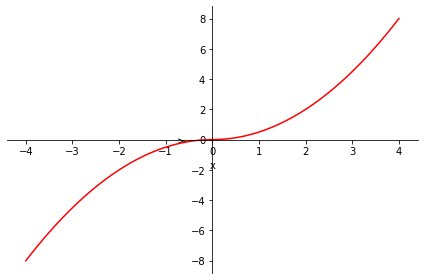

In [4]:
# Primero dibujamos la función para tener su interpretación más a mano.
f_expr = 0.5*x*sp.Abs(x)
p = sp.plot(f_expr, (x, -4, 4), show=False)
p[0].line_color='r'
p.xlabel='x'
p.ylabel='y'
p.show()

In [5]:
# A continuación deberemos comprobar que la función f sea continua, para ello calcularemos sus límites laterales y veremos si estos coinciden:
f = sp.Lambda(x, f_expr)
display(sp.limit(f(x),x,0,dir='-')) # Límite por la izquierda de dicha función.
display(sp.limit(f(x),x,0,dir='+')) # Límite por la derecha de dicha función.
print('f es de clase 0?', sp.limit(f(x),x,0) == f(0)) # El predicado que compara el resultado de ambos límites.

0

0

f es de clase 0? True


In [ ]:
# Como podemos ver ambos límites coinciden por lo que podemos afirmar que la función es continua.
# A continuación procederemos a calcular la derivada de f a mano.

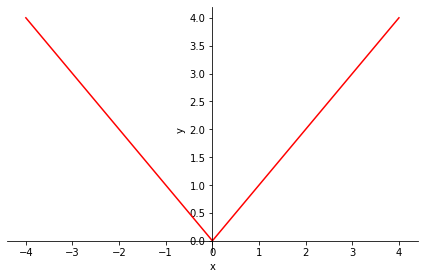

In [6]:
# Una vez calculada la derivada pasaremos a representarla en sympy.
p = sp.plot(f_expr.diff(x,1), (x, -4, 4), show=False)
p[0].line_color='r'
p.xlabel='x'
p.ylabel='y'
p.show()

In [9]:
# Ahora procederemos a calcular la derivada segunda de f a mano.

In [10]:
# Al realizar las operaciones pertinentes vemos que las derivadas laterales no coinciden, por lo que procedemos a comprobarlo en simpy:
f1_expr = f_expr.diff(x,1)
f1 = sp.Lambda(x, f1_expr)

h = sp.symbols('h', real=True)
f2_0Minus = sp.limit((f1(h)-f1(0))/h,h,0,dir='-')
f2_0Plus = sp.limit((f1(h)-f1(0))/h,h,0,dir='+')
print('f2_0Minus = ', f2_0Minus, ', f2_0Plus = ', f2_0Plus) 
print('Existe f\'\'(0)?',f2_0Minus==f2_0Plus)

f2_0Minus =  -1 , f2_0Plus =  1
Existe f''(0)? False


In [ ]:
# TEOREMA DE TAYLOR 

El valor de ln(1.3) es:  0.262364264467491 

La recta tangente a f(x) = log(x)  en x=1 es: P1(x) = x - 1 



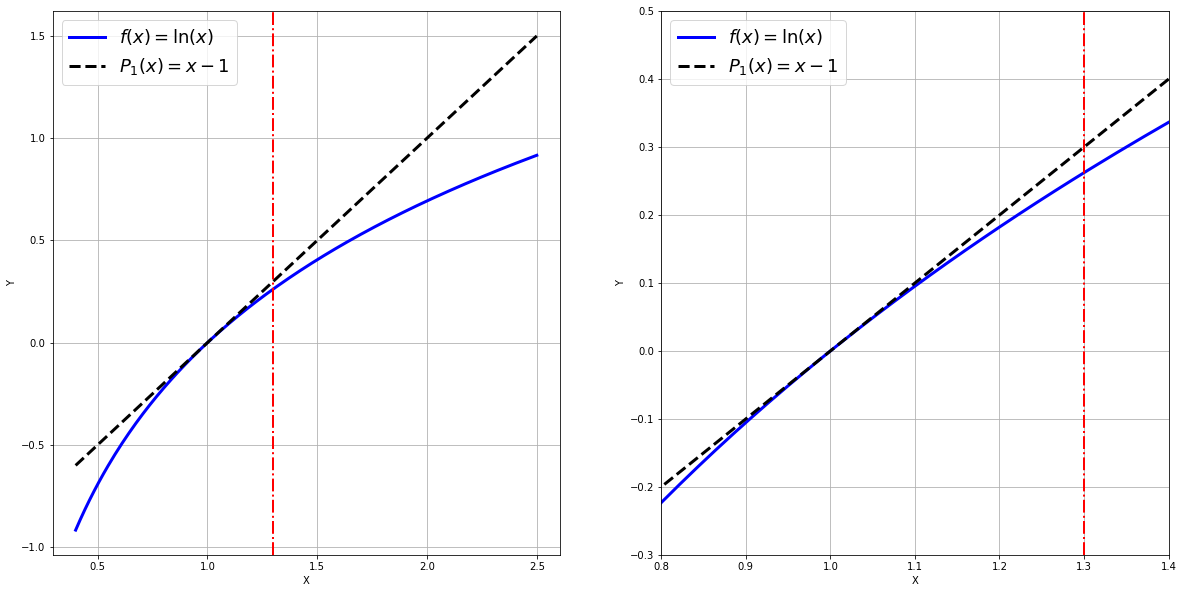

In [11]:
import numpy as np
import sympy as sp
import matplotlib as mp
import matplotlib.pyplot as plt
mp.__version__

%matplotlib inline

# definimos la función
x = sp.symbols('x', real=True) # define la variable simbólica x
f_expr = sp.log(x)
f = sp.Lambda(x,f_expr)

print('El valor de ln(1.3) es: ', f(1.3),'\n')

# definimos la recta tangente por 1
f_der=  sp.diff(f(x),x)
f1 = sp.Lambda(x,f_der)
rt = f1(1)*(x-1) + f(1)

print('La recta tangente a f(x) =',f(x),' en x=1 es: P1(x) =', rt,'\n')

# punto de interés
x0 = 1.3

# Creamos gráficos de funciones
x1 = np.linspace(0.4, 2.5, 200)
y1 = np.log(x1)
y2 = f1(1)*(x1-1) + f(1)

fig, axs = plt.subplots(1, 2, figsize=(20,10))

ax1 = axs[0]
ax1.plot(x1, y1, c='b', lw='3',  label='$f(x)=\ln(x)$')
ax1.plot(x1, y2, c='k', ls='--', lw='3', label='$P_1(x)=x-1$')
ax1.axvline(x=1.3, c='red', ls='-.', lw='2')
ax1.set_ylabel('Y', fontsize=10)
ax1.set_xlabel('X', fontsize=10)
ax1.grid()
ax1.legend(prop={'size': 18})


ax2 = axs[1]
ax2.plot(x1, y1, c='b', lw='3', label='$f(x)=\ln(x)$')
ax2.plot(x1, y2, c='k', ls='--', lw='3', label='$P_1(x)=x-1$')
ax2.axvline(x=1.3, c='red', ls='-.', lw='2')
ax2.set_ylabel('Y', fontsize=10)
ax2.set_xlabel('X', fontsize=10)
plt.xlim(0.8,1.4)
plt.ylim(-0.3,0.5)
ax2.set_xticks(np.arange(0.8,1.5,0.1))
ax2.set_yticks(np.arange(-0.3,0.6,0.1))
ax2.grid()
ax2.legend(prop={'size': 18})

In [ ]:
# Lo que estamos viendo en la gráfica no es más que la superposición de ln(1.3) con la recta tangente de la misma función cuando este es x=1. 
# Lo que hace en este caso es aproximar la función inicial comparándola con el recorrido de la tangente del valor entero más cercano al inicial, en este caso x=1.
# La idea se basa en buscar una aproximación gráfica, por lo que ahora pasaremos a buscar la tangente pero esta vez en lugar de en x=1; en x=1.3

-1 + x + O((x - 1)**2, (x, 1))

True

El polinomio de Taylor de orden 2 es:


x - (x - 1)**2/2 - 1

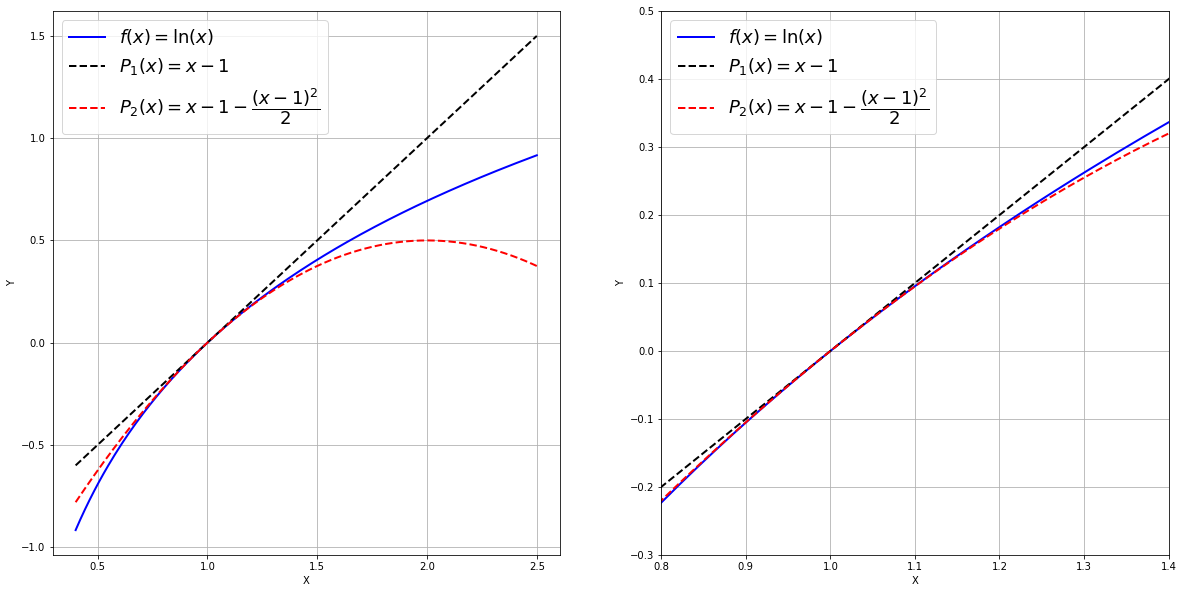

In [12]:
# punto en el que centramos el polinomio de Taylor
x0 = 1

# función que queremos aproximar
fx = sp.log(x)

# calculamos el Polinomio de Taylor de grado n centrado en x0
n = 1 # grado del polinomio
P1 = sp.series(fx,x,x0,n+1)
display(P1) 
# la O() representa los términos de orden superior que aparecerían en un polinomio de orden superior, por lo que la eliminamos
P1=P1.removeO()
# que coincide con la recta tangente calculada anteriormente (rt)
display(P1==rt)

# calculamos el polinomio de Taylor de orden 2
P2 = sp.series(fx,x,x0,3)
P2=P2.removeO()
print('El polinomio de Taylor de orden 2 es:')
display(P2)


# Creamos gráficos de funciones
x1 = np.linspace(0.4, 2.5, 200)
y1 = np.log(x1)
y2 = f1(1)*(x1-1) + f(1)
# evaluamos P2 en los puntos de x1
p2x = np.zeros(len(x1))
for k in range(len(x1)):
    p2x[k] = P2.subs({x:x1[k]})
    

fig, axs = plt.subplots(1, 2, figsize=(20,10))

ax1 = axs[0]
ax1.plot(x1, y1, c='b', lw='2',  label='$f(x)=\ln(x)$')
ax1.plot(x1, y2, c='k', ls='--', lw='2', label='$P_1(x)=x-1$')
ax1.plot(x1, p2x, c='r', ls='--', lw='2', label='$P_2(x)=x-1 - \dfrac{(x-1)^2}{2}$')
ax1.set_ylabel('Y', fontsize=10)
ax1.set_xlabel('X', fontsize=10)
ax1.grid()
ax1.legend(prop={'size': 18})


ax2 = axs[1]
ax2.plot(x1, y1, c='b', lw='2', label='$f(x)=\ln(x)$')
ax2.plot(x1, y2, c='k', ls='--', lw='2', label='$P_1(x)=x-1$')
ax2.plot(x1, p2x, c='r', ls='--', lw='2', label='$P_2(x)=x-1 - \dfrac{(x-1)^2}{2}$')
ax2.set_ylabel('Y', fontsize=10)
ax2.set_xlabel('X', fontsize=10)
plt.xlim(0.8,1.4)
plt.ylim(-0.3,0.5)
ax2.set_xticks(np.arange(0.8,1.5,0.1))
ax2.set_yticks(np.arange(-0.3,0.6,0.1))
ax2.grid()
ax2.legend(prop={'size': 18})

x - x**2/2 + O(x**3)

-x**2/2 + x

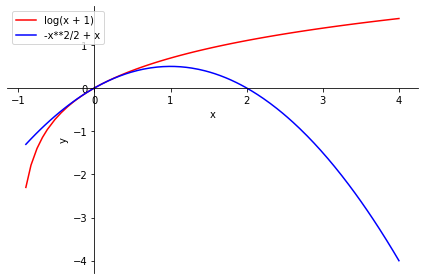

0.0950000000000000

0.0953101798043249

0.000310179804324934

2/(x + 1)**3

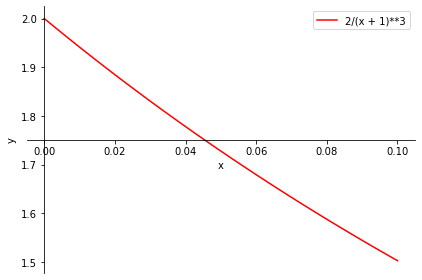

-6/(x + 1)**4

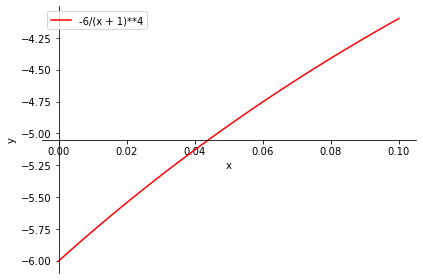

2

1/3000

In [1]:
# EJEMPLO DE LA APLICACIÓN DEL POLINOMIO DE TAYLOR 

import sympy as sp

 

x = sp.symbols('x', real=True)

 

# punto en el que centramos el polinomio de Taylor
x0 = 0

 

# función que queremos aproximar
f = sp.log(1+x)

 

# calculamos el Polinomio de Taylor de grado n centrado en x0
n = 2 # grado del polinomio
P = sp.series(f,x,x0,n+1)
display(P) 
# la O() representa los términos de orden superior que aparecerían en un polinomio de orden superior, por lo que la eliminamos
P=P.removeO()
display(P)

 

p = sp.plot(f, P, (x, -0.9, 4), show=False)
p[0].line_color='r'
p[1].line_color='b'
p.xlabel='x'
p.ylabel='y'
p.legend=True
p.show()

 

fL = sp.Lambda((x),f)
PL = sp.Lambda((x),P)

 

display(PL(0.1))
display(fL(0.1))
display(sp.Abs(PL(0.1)-fL(0.1)))

 

fx3 = f.diff(x,3)
display(fx3)

 

p = sp.plot(fx3, (x, 0, 0.1), show=False)
p[0].line_color='r'
p.xlabel='x'
p.ylabel='y'
p.legend=True
p.show()

 

fx4 = f.diff(x,4)
display(fx4)

 

p = sp.plot(fx4, (x, 0, 0.1), show=False)
p[0].line_color='r'
p.xlabel='x'
p.ylabel='y'
p.legend=True
p.show()

 

supremo = sp.Abs(fx3.subs(x,0))
display(supremo)
acotacione = supremo/sp.factorial(3) * sp.Rational('1/10')**3
display(acotacione)